In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from collections import Counter
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
import seaborn as sns

In [2]:
df = pd.read_csv('data-projet7.csv')

In [3]:
pop = pd.read_csv('population.csv')

In [4]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1519 entries, 0 to 1518
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Name  1519 non-null   object
 1   Country Code  1519 non-null   object
 2   Time          1519 non-null   int64 
 3   Time Code     1519 non-null   object
 4   Population    1519 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 59.5+ KB


In [5]:
pop.rename(columns={'Country Name':'Pays', 'Country Code':'country', 'Time':'year_survey'}, inplace=True)
pop

,Pays,country,year_survey,Time Code,Population
0,Afghanistan,AFG,2004,YR2004,24726689
1,Afghanistan,AFG,2006,YR2006,26433058
2,Afghanistan,AFG,2007,YR2007,27100542
3,Afghanistan,AFG,2008,YR2008,27722281
4,Afghanistan,AFG,2009,YR2009,28394806
...,...,...,...,...,...
1514,Zimbabwe,ZWE,2007,YR2007,12255920
1515,Zimbabwe,ZWE,2008,YR2008,12379553
1516,Zimbabwe,ZWE,2009,YR2009,12526964
1517,Zimbabwe,ZWE,2010,YR2010,12697728


In [6]:
country = pop[['Pays', 'country', 'year_survey', 'Population']]
country

,Pays,country,year_survey,Population
0,Afghanistan,AFG,2004,24726689
1,Afghanistan,AFG,2006,26433058
2,Afghanistan,AFG,2007,27100542
3,Afghanistan,AFG,2008,27722281
4,Afghanistan,AFG,2009,28394806
...,...,...,...,...
1514,Zimbabwe,ZWE,2007,12255920
1515,Zimbabwe,ZWE,2008,12379553
1516,Zimbabwe,ZWE,2009,12526964
1517,Zimbabwe,ZWE,2010,12697728


### Intégration des noms des pays et leur population

In [7]:
data = country.merge(df, on=['country', 'year_survey'], how='right')
data

,Pays,country,year_survey,Population,quantile,nb_quantiles,income,gdpppp
0,Albanie,ALB,2008,2947314.0,1,100,"728,89795",7297
1,Albanie,ALB,2008,2947314.0,2,100,"916,66235",7297
2,Albanie,ALB,2008,2947314.0,3,100,"1010,916",7297
3,Albanie,ALB,2008,2947314.0,4,100,"1086,9078",7297
4,Albanie,ALB,2008,2947314.0,5,100,"1132,6997",7297
...,...,...,...,...,...,...,...,...
11594,"Congo, République démocratique du",COD,2008,60411195.0,96,100,"810,6233","303,19305"
11595,"Congo, République démocratique du",COD,2008,60411195.0,97,100,"911,7834","303,19305"
11596,"Congo, République démocratique du",COD,2008,60411195.0,98,100,"1057,8074","303,19305"
11597,"Congo, République démocratique du",COD,2008,60411195.0,99,100,"1286,6029","303,19305"


In [8]:
data.duplicated().sum()

0

### Pas de doublons

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11599 entries, 0 to 11598
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pays          11499 non-null  object 
 1   country       11599 non-null  object 
 2   year_survey   11599 non-null  int64  
 3   Population    11499 non-null  float64
 4   quantile      11599 non-null  int64  
 5   nb_quantiles  11599 non-null  int64  
 6   income        11599 non-null  object 
 7   gdpppp        11399 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 815.6+ KB


### 200 valeurs manquantes pour "gdpppp"

In [10]:
data.income = data.income.str.replace(',','.')
data.gdpppp = data.gdpppp.str.replace(',','.')

In [11]:
data[data.gdpppp.isna()]

,Pays,country,year_survey,Population,quantile,nb_quantiles,income,gdpppp
5800,Kosovo,XKX,2008,1747383.0,1,100,437.8937,NaN
5801,Kosovo,XKX,2008,1747383.0,2,100,508.17133,NaN
5802,Kosovo,XKX,2008,1747383.0,3,100,591.8282,NaN
5803,Kosovo,XKX,2008,1747383.0,4,100,668,NaN
5804,Kosovo,XKX,2008,1747383.0,5,100,730.4022,NaN
...,...,...,...,...,...,...,...,...
11294,Cisjordanie et Gaza,PSE,2009,3689099.0,96,100,2763.8848,NaN
11295,Cisjordanie et Gaza,PSE,2009,3689099.0,97,100,3077.8333,NaN
11296,Cisjordanie et Gaza,PSE,2009,3689099.0,98,100,3449.2224,NaN
11297,Cisjordanie et Gaza,PSE,2009,3689099.0,99,100,4165.997,NaN


In [12]:
data[data.gdpppp.isna()].country.unique()

array(['XKX', 'PSE'], dtype=object)

In [13]:
data[data.gdpppp.isna()]['year_survey'].unique()

array([2008, 2009], dtype=int64)

### Nous observons qu'il nous manque le GDP PPP pour le Kosovo à l'année 2008 et celui de la Palestine pour l'année 2009.

In [14]:
data.loc[data.Pays=='Kosovo', 'gdpppp'] = 7949.25
data.loc[data.country=='PSE', 'gdpppp'] = 5250.12

In [15]:
data[(data.country=='PSE') | (data.country=='XKX')]

,Pays,country,year_survey,Population,quantile,nb_quantiles,income,gdpppp
5800,Kosovo,XKX,2008,1747383.0,1,100,437.8937,7949.25
5801,Kosovo,XKX,2008,1747383.0,2,100,508.17133,7949.25
5802,Kosovo,XKX,2008,1747383.0,3,100,591.8282,7949.25
5803,Kosovo,XKX,2008,1747383.0,4,100,668,7949.25
5804,Kosovo,XKX,2008,1747383.0,5,100,730.4022,7949.25
...,...,...,...,...,...,...,...,...
11294,Cisjordanie et Gaza,PSE,2009,3689099.0,96,100,2763.8848,5250.12
11295,Cisjordanie et Gaza,PSE,2009,3689099.0,97,100,3077.8333,5250.12
11296,Cisjordanie et Gaza,PSE,2009,3689099.0,98,100,3449.2224,5250.12
11297,Cisjordanie et Gaza,PSE,2009,3689099.0,99,100,4165.997,5250.12


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11599 entries, 0 to 11598
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pays          11499 non-null  object 
 1   country       11599 non-null  object 
 2   year_survey   11599 non-null  int64  
 3   Population    11499 non-null  float64
 4   quantile      11599 non-null  int64  
 5   nb_quantiles  11599 non-null  int64  
 6   income        11599 non-null  object 
 7   gdpppp        11599 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 815.6+ KB


### Données manquantes de population concernant un pays

In [17]:
data[data.Pays.isna()]

,Pays,country,year_survey,Population,quantile,nb_quantiles,income,gdpppp
10399,NaN,TWN,2008,NaN,1,100,3477.18,25342
10400,NaN,TWN,2008,NaN,2,100,4740.2637,25342
10401,NaN,TWN,2008,NaN,3,100,5331.3013,25342
10402,NaN,TWN,2008,NaN,4,100,5761.6577,25342
10403,NaN,TWN,2008,NaN,5,100,6093.2017,25342
...,...,...,...,...,...,...,...,...
10494,NaN,TWN,2008,NaN,96,100,38123.46,25342
10495,NaN,TWN,2008,NaN,97,100,41663.79,25342
10496,NaN,TWN,2008,NaN,98,100,46650.582,25342
10497,NaN,TWN,2008,NaN,99,100,54016.992,25342


In [18]:
data.loc[data.country=='TWN', 'Pays'] = 'Taïwan'
data.loc[data.country=='TWN', 'Population'] = 23037000

In [19]:
data[data.country=='TWN']

,Pays,country,year_survey,Population,quantile,nb_quantiles,income,gdpppp
10399,Taïwan,TWN,2008,23037000.0,1,100,3477.18,25342
10400,Taïwan,TWN,2008,23037000.0,2,100,4740.2637,25342
10401,Taïwan,TWN,2008,23037000.0,3,100,5331.3013,25342
10402,Taïwan,TWN,2008,23037000.0,4,100,5761.6577,25342
10403,Taïwan,TWN,2008,23037000.0,5,100,6093.2017,25342
...,...,...,...,...,...,...,...,...
10494,Taïwan,TWN,2008,23037000.0,96,100,38123.46,25342
10495,Taïwan,TWN,2008,23037000.0,97,100,41663.79,25342
10496,Taïwan,TWN,2008,23037000.0,98,100,46650.582,25342
10497,Taïwan,TWN,2008,23037000.0,99,100,54016.992,25342


In [20]:
data.Population = data.Population.astype(int)

In [21]:
data

,Pays,country,year_survey,Population,quantile,nb_quantiles,income,gdpppp
0,Albanie,ALB,2008,2947314,1,100,728.89795,7297
1,Albanie,ALB,2008,2947314,2,100,916.66235,7297
2,Albanie,ALB,2008,2947314,3,100,1010.916,7297
3,Albanie,ALB,2008,2947314,4,100,1086.9078,7297
4,Albanie,ALB,2008,2947314,5,100,1132.6997,7297
...,...,...,...,...,...,...,...,...
11594,"Congo, République démocratique du",COD,2008,60411195,96,100,810.6233,303.19305
11595,"Congo, République démocratique du",COD,2008,60411195,97,100,911.7834,303.19305
11596,"Congo, République démocratique du",COD,2008,60411195,98,100,1057.8074,303.19305
11597,"Congo, République démocratique du",COD,2008,60411195,99,100,1286.6029,303.19305


### Conversion de "income" et "gdpppp" en float.

In [22]:
data.income = data.income.astype(float)
data.gdpppp = data.gdpppp.astype(float)

In [23]:
data.country.nunique()

116

### Il manque une valeur. En effet nous avons 100 quantiles par pays, nous sommes donc censés avoir 11600 lignes, ce qui n'est pas le cas ici.

In [24]:
test = data.groupby('country').count()

In [25]:
test

,Pays,year_survey,Population,quantile,nb_quantiles,income,gdpppp
country,,,,,,,
ALB,100,100,100,100,100,100,100
ARG,100,100,100,100,100,100,100
ARM,100,100,100,100,100,100,100
AUT,100,100,100,100,100,100,100
AZE,100,100,100,100,100,100,100
...,...,...,...,...,...,...,...
VEN,100,100,100,100,100,100,100
VNM,100,100,100,100,100,100,100
XKX,100,100,100,100,100,100,100


In [26]:
test[test['nb_quantiles'] < 100]

,Pays,year_survey,Population,quantile,nb_quantiles,income,gdpppp
country,,,,,,,
LTU,99,99,99,99,99,99,99


In [27]:
LTU = data[data.country == 'LTU']
LTU

,Pays,country,year_survey,Population,quantile,nb_quantiles,income,gdpppp
6200,Lituanie,LTU,2008,3198231,1,100,566.3453,17571.0
6201,Lituanie,LTU,2008,3198231,2,100,1147.0587,17571.0
6202,Lituanie,LTU,2008,3198231,3,100,1490.8408,17571.0
6203,Lituanie,LTU,2008,3198231,4,100,1746.5715,17571.0
6204,Lituanie,LTU,2008,3198231,5,100,1842.9542,17571.0
...,...,...,...,...,...,...,...,...
6294,Lituanie,LTU,2008,3198231,96,100,14597.0360,17571.0
6295,Lituanie,LTU,2008,3198231,97,100,15659.0080,17571.0
6296,Lituanie,LTU,2008,3198231,98,100,17883.8770,17571.0
6297,Lituanie,LTU,2008,3198231,99,100,22551.1700,17571.0


In [28]:
LTU['quantile'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

### Il nous manque le 41ème quantile

In [29]:
LTU.loc[[6239,6240]]

,Pays,country,year_survey,Population,quantile,nb_quantiles,income,gdpppp
6239,Lituanie,LTU,2008,3198231,40,100,4868.4507,17571.0
6240,Lituanie,LTU,2008,3198231,42,100,4895.8306,17571.0


In [30]:
# Calcul du quantile 41
ltu_41 = LTU.loc[[6239,6240]].income.mean()
ltu_41

4882.14065

In [31]:
# Création de la ligne du quantile 41
ltu_41_row = pd.DataFrame({'Pays':['Lituanie'],'country':['LTU'], 'year_survey':[2008], 'Population':[3198231], 'quantile':[41], 'nb_quantiles':[100], 'income':[ltu_41], 'gdpppp':[17571.0]})
ltu_41_row

,Pays,country,year_survey,Population,quantile,nb_quantiles,income,gdpppp
0,Lituanie,LTU,2008,3198231,41,100,4882.14065,17571.0


In [32]:
data = pd.concat([data, ltu_41_row], ignore_index=True, sort=True)

In [33]:
data.sort_values(['country', 'quantile'], inplace=True)

In [34]:
data

,Pays,Population,country,gdpppp,income,nb_quantiles,quantile,year_survey
0,Albanie,2947314,ALB,7297.0,728.89795,100,1,2008
1,Albanie,2947314,ALB,7297.0,916.66235,100,2,2008
2,Albanie,2947314,ALB,7297.0,1010.91600,100,3,2008
3,Albanie,2947314,ALB,7297.0,1086.90780,100,4,2008
4,Albanie,2947314,ALB,7297.0,1132.69970,100,5,2008
...,...,...,...,...,...,...,...,...
11494,Afrique du Sud,49779472,ZAF,9602.0,24553.56800,100,96,2008
11495,Afrique du Sud,49779472,ZAF,9602.0,28858.03100,100,97,2008
11496,Afrique du Sud,49779472,ZAF,9602.0,35750.29000,100,98,2008
11497,Afrique du Sud,49779472,ZAF,9602.0,46297.31600,100,99,2008


### Calcul de l'indice de Gini pour chaque pays

In [35]:
data.head()

,Pays,Population,country,gdpppp,income,nb_quantiles,quantile,year_survey
0,Albanie,2947314,ALB,7297.0,728.89795,100,1,2008
1,Albanie,2947314,ALB,7297.0,916.66235,100,2,2008
2,Albanie,2947314,ALB,7297.0,1010.91600,100,3,2008
3,Albanie,2947314,ALB,7297.0,1086.90780,100,4,2008
4,Albanie,2947314,ALB,7297.0,1132.69970,100,5,2008


In [36]:
list_gini = []
for code in data.country : 
    dep = data[data.country == code]['income'].values
    n = len(dep)
    lorenz = np.cumsum(np.sort(dep)) / dep.sum()

    AUC = lorenz.sum()/len(lorenz)
    S = 0.5 - AUC 
    gini = round(2*S, 6)
    list_gini.append(gini)

In [37]:
data['gini'] = list_gini
data

,Pays,Population,country,gdpppp,income,nb_quantiles,quantile,year_survey,gini
0,Albanie,2947314,ALB,7297.0,728.89795,100,1,2008,0.294624
1,Albanie,2947314,ALB,7297.0,916.66235,100,2,2008,0.294624
2,Albanie,2947314,ALB,7297.0,1010.91600,100,3,2008,0.294624
3,Albanie,2947314,ALB,7297.0,1086.90780,100,4,2008,0.294624
4,Albanie,2947314,ALB,7297.0,1132.69970,100,5,2008,0.294624
...,...,...,...,...,...,...,...,...,...
11494,Afrique du Sud,49779472,ZAF,9602.0,24553.56800,100,96,2008,0.659779
11495,Afrique du Sud,49779472,ZAF,9602.0,28858.03100,100,97,2008,0.659779
11496,Afrique du Sud,49779472,ZAF,9602.0,35750.29000,100,98,2008,0.659779
11497,Afrique du Sud,49779472,ZAF,9602.0,46297.31600,100,99,2008,0.659779


In [38]:
income_avg = data[['country', 'income']].groupby('country').mean().reset_index()
income_avg.rename(columns={'income':'income_avg'}, inplace=True)

In [39]:
data = data.merge(income_avg, on='country')
data

,Pays,Population,country,gdpppp,income,nb_quantiles,quantile,year_survey,gini,income_avg
0,Albanie,2947314,ALB,7297.0,728.89795,100,1,2008,0.294624,2994.829902
1,Albanie,2947314,ALB,7297.0,916.66235,100,2,2008,0.294624,2994.829902
2,Albanie,2947314,ALB,7297.0,1010.91600,100,3,2008,0.294624,2994.829902
3,Albanie,2947314,ALB,7297.0,1086.90780,100,4,2008,0.294624,2994.829902
4,Albanie,2947314,ALB,7297.0,1132.69970,100,5,2008,0.294624,2994.829902
...,...,...,...,...,...,...,...,...,...,...
11595,Afrique du Sud,49779472,ZAF,9602.0,24553.56800,100,96,2008,0.659779,5617.904880
11596,Afrique du Sud,49779472,ZAF,9602.0,28858.03100,100,97,2008,0.659779,5617.904880
11597,Afrique du Sud,49779472,ZAF,9602.0,35750.29000,100,98,2008,0.659779,5617.904880
11598,Afrique du Sud,49779472,ZAF,9602.0,46297.31600,100,99,2008,0.659779,5617.904880


## Mission 1

### Les années couvertes par les données de l'analyse

In [40]:
data['year_survey'].unique()

array([2008, 2009, 2010, 2007, 2006, 2011, 2004], dtype=int64)

### Le nombre de pays présents dans l'analyse

In [41]:
data.Pays.nunique()

116

### Population couverte par l'analyse

### Comme l'année la plus récente couverte par l'analyse est 2011, nous nous baserons sur la population mondiale de 2011

In [42]:
pop_2011 = pop[pop['year_survey'] == 2011]

In [43]:
pop_tot_2011 = pop_2011.Population.sum()
pop_tot_2011

6980579963

In [44]:
pop_an = data.Population.sum()/100

In [45]:
print(f"La population couverte par l'analyse représente  {round(pop_an/pop_tot_2011*100, 2)}  % de la population mondiale.")

La population couverte par l'analyse représente  88.65  % de la population mondiale.


### Les années couvertes par l'analyse vont de 2004 à 2011 (2005 non représentée).
### 116 pays sont présents dans cette analyse.
### Les quantiles utilisés pour l'ensemble des pays sont des centiles.
### Echantillonner une population par des quantiles nous permet une distribution plus précise d'une certaine variable, en fonction de plusieurs classes, ce qui rend l'analyse plus précise.
### Le $PPP , qu'on appelle également parité de pouvoir d'achat, permet d'égaliser les pouvoirs d'achat des différentes monnaies, ce qui nous permet de les comparer directement.

## Mission 2

### Pour montrer la diversité des pays en termes de distribution de revenus, nous allons diviser les pays en 5 groupes, selon leur indice de Gini, et en sélectionner 2 de chaque groupe.

In [46]:
data['groupe_gini'] = pd.qcut(data.gini, q=[0, 0.18, 0.42, 0.6, 0.8, 1], labels=['1', '2', '3', '4', '5'])

In [47]:
data_1 = data[data['groupe_gini']== '1']
data_2 = data[data['groupe_gini']== '2']
data_3 = data[data['groupe_gini']== '3']
data_4 = data[data['groupe_gini']== '4']
data_5 = data[data['groupe_gini']== '5']

In [48]:
data_1.Pays.unique()

array(['Arménie', 'Autriche', 'Belgique', 'Bélarus', 'Chypre',
       'République tchèque', 'Danemark', 'Finlande', 'Hongrie', 'Islande',
       'Kazakhstan', 'Kenya', 'Luxembourg', 'Monténégro', 'Pays-Bas',
       'Norvège', 'Serbie', 'République slovaque', 'Slovénie', 'Suède',
       'Ukraine'], dtype=object)

In [49]:
data_2.Pays.unique()

array(['Albanie', 'Azerbaïdjan', 'Bangladesh', 'Allemagne',
       'Égypte, République arabe d’', 'Espagne', 'Estonie', 'France',
       'Royaume-Uni', 'Grèce', 'Croatie', 'Inde', 'Irlande', 'Italie',
       'Jordanie', 'Japon', 'Cambodge', 'Lituanie', 'Moldova', 'Mali',
       'Népal', 'Pakistan', 'Pologne', 'Soudan', 'Tadjikistan',
       'Timor-Leste', 'Taïwan', 'Kosovo'], dtype=object)

In [50]:
data_3.Pays.unique()

array(['Bulgarie', 'Bosnie-Herzégovine', 'Bhoutan', 'Canada', 'Cameroun',
       'Indonésie', 'Iraq', 'République kirghize', 'Corée, République de',
       'République démocratique populaire lao', 'Libéria', 'Lettonie',
       'Mongolie', 'Niger', 'Portugal', 'Cisjordanie et Gaza', 'Roumanie',
       'République arabe syrienne', 'Tanzanie', 'Viet Nam',
       'Yémen, Rép. du'], dtype=object)

In [51]:
data_4.Pays.unique()

array(['Argentine', 'Burkina Faso', "Côte d'Ivoire",
       'Congo, République démocratique du', 'Fidji', 'Géorgie', 'Ghana',
       'Guinée', 'Iran, République islamique d’', 'Israël', 'Sri Lanka',
       'Maroc', 'Madagascar', 'Macédoine du Nord', 'Mozambique',
       'Mauritanie', 'Malawi', 'Philippines', 'Fédération de Russie',
       'Turquie', 'Ouganda', 'États-Unis', 'Venezuela'], dtype=object)

In [52]:
data_5.Pays.unique()

array(['Bolivie', 'Brésil', 'République centrafricaine', 'Chili', 'Chine',
       'Colombie', 'Costa Rica', 'République dominicaine', 'Équateur',
       'Guatemala', 'Honduras', 'Mexique', 'Malaisie', 'Nigéria',
       'Nicaragua', 'Panama', 'Pérou', 'Paraguay', 'El Salvador',
       'Eswatini', 'Thaïlande', 'Uruguay', 'Afrique du Sud'], dtype=object)

### Choix des pays

In [53]:
country_list = ['Luxembourg', 'Norvège', 'Allemagne', 'Royaume-Uni', 'Fédération de Russie', 'Portugal', 'Thaïlande', 'États-Unis', 'Paraguay', 'Géorgie']
country_code = ['LUX', 'NOR', 'DEU', 'GBR', 'RUS', 'PRT', 'THA', 'USA', 'PRY', 'GEO']

### Graphiques des distributions de revenus.

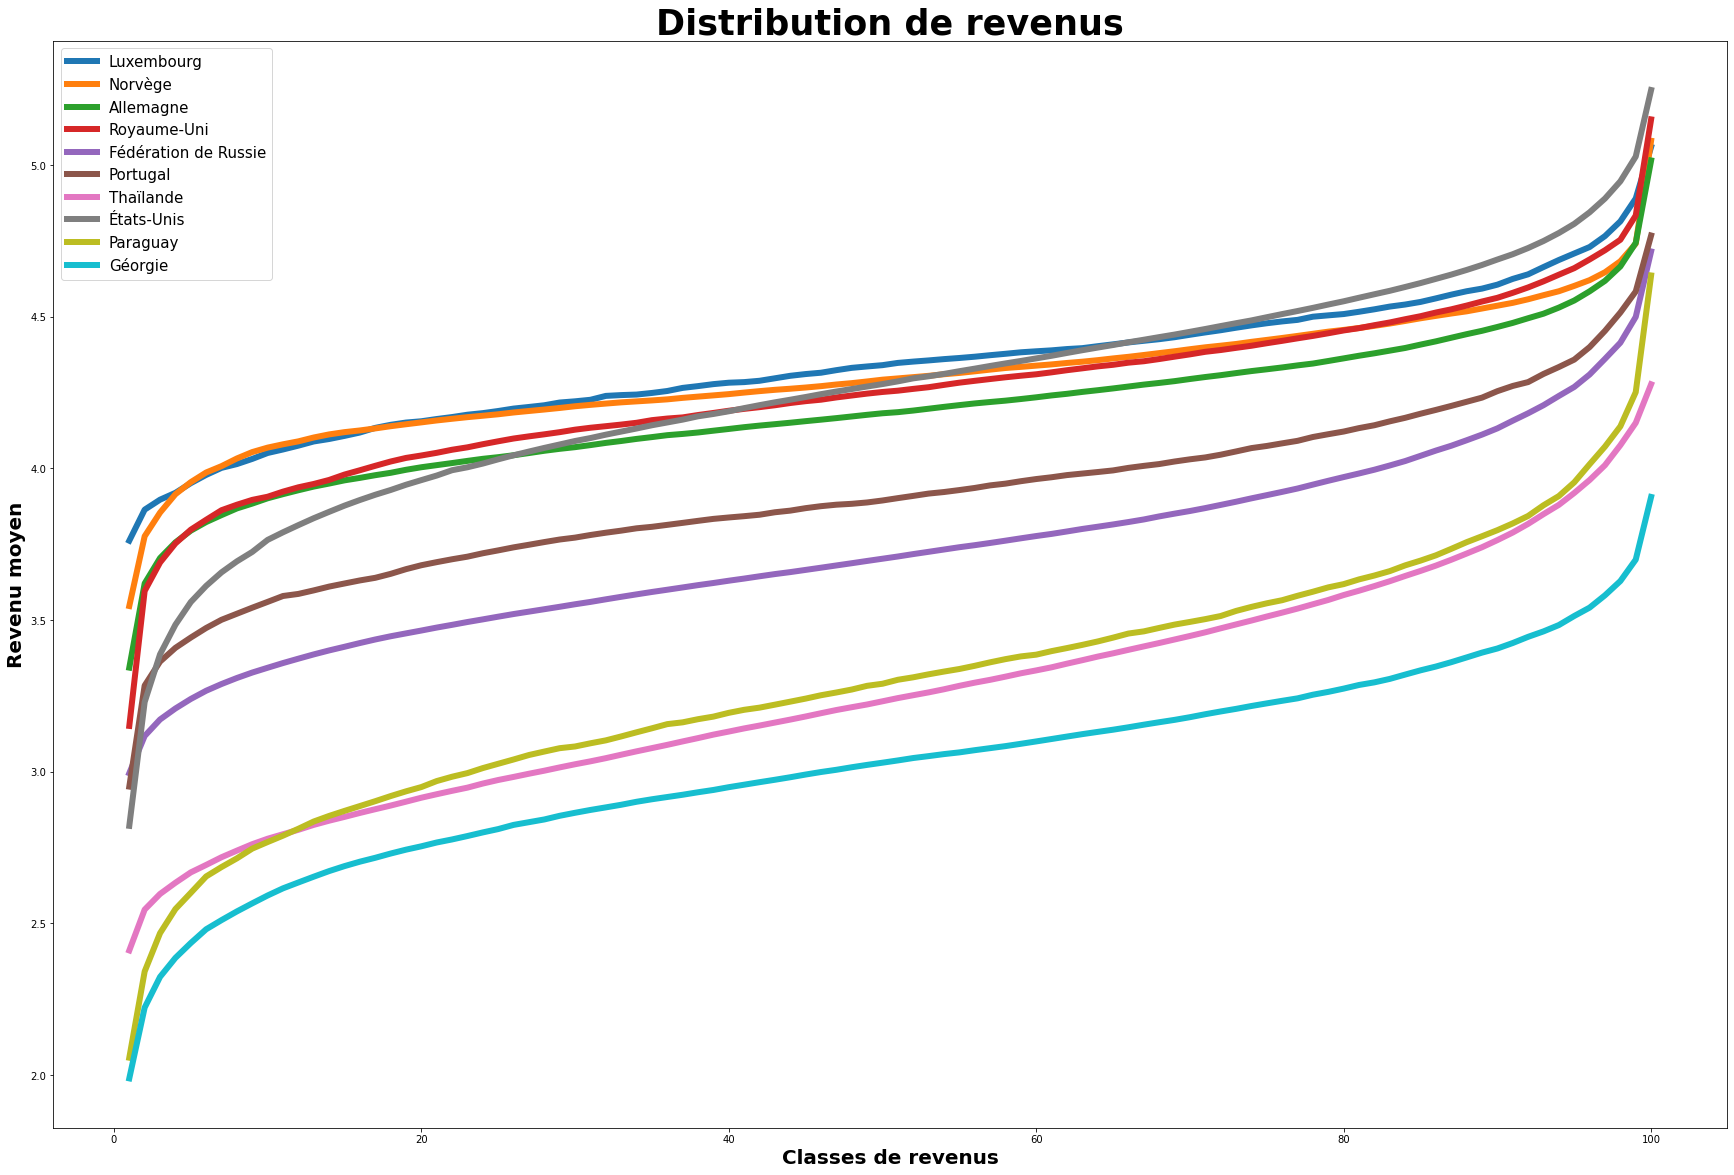

In [54]:
#Distribution des revenus 
plt.figure(figsize=(30,20))

for x in country_list: 
    data_df = data[data.Pays == x]
    plt.plot(data_df['quantile'], np.log10(data_df['income']), label=x,linewidth=6)

plt.title("Distribution de revenus", fontsize=35, fontweight='bold')
plt.xlabel("Classes de revenus", fontsize=20, fontweight='bold')
plt.ylabel("Revenu moyen", fontsize=20, fontweight='bold')
plt.legend(fontsize=15)

plt.savefig('p7_graphic/distribution_revenu_country_plot.jpg')
plt.show()

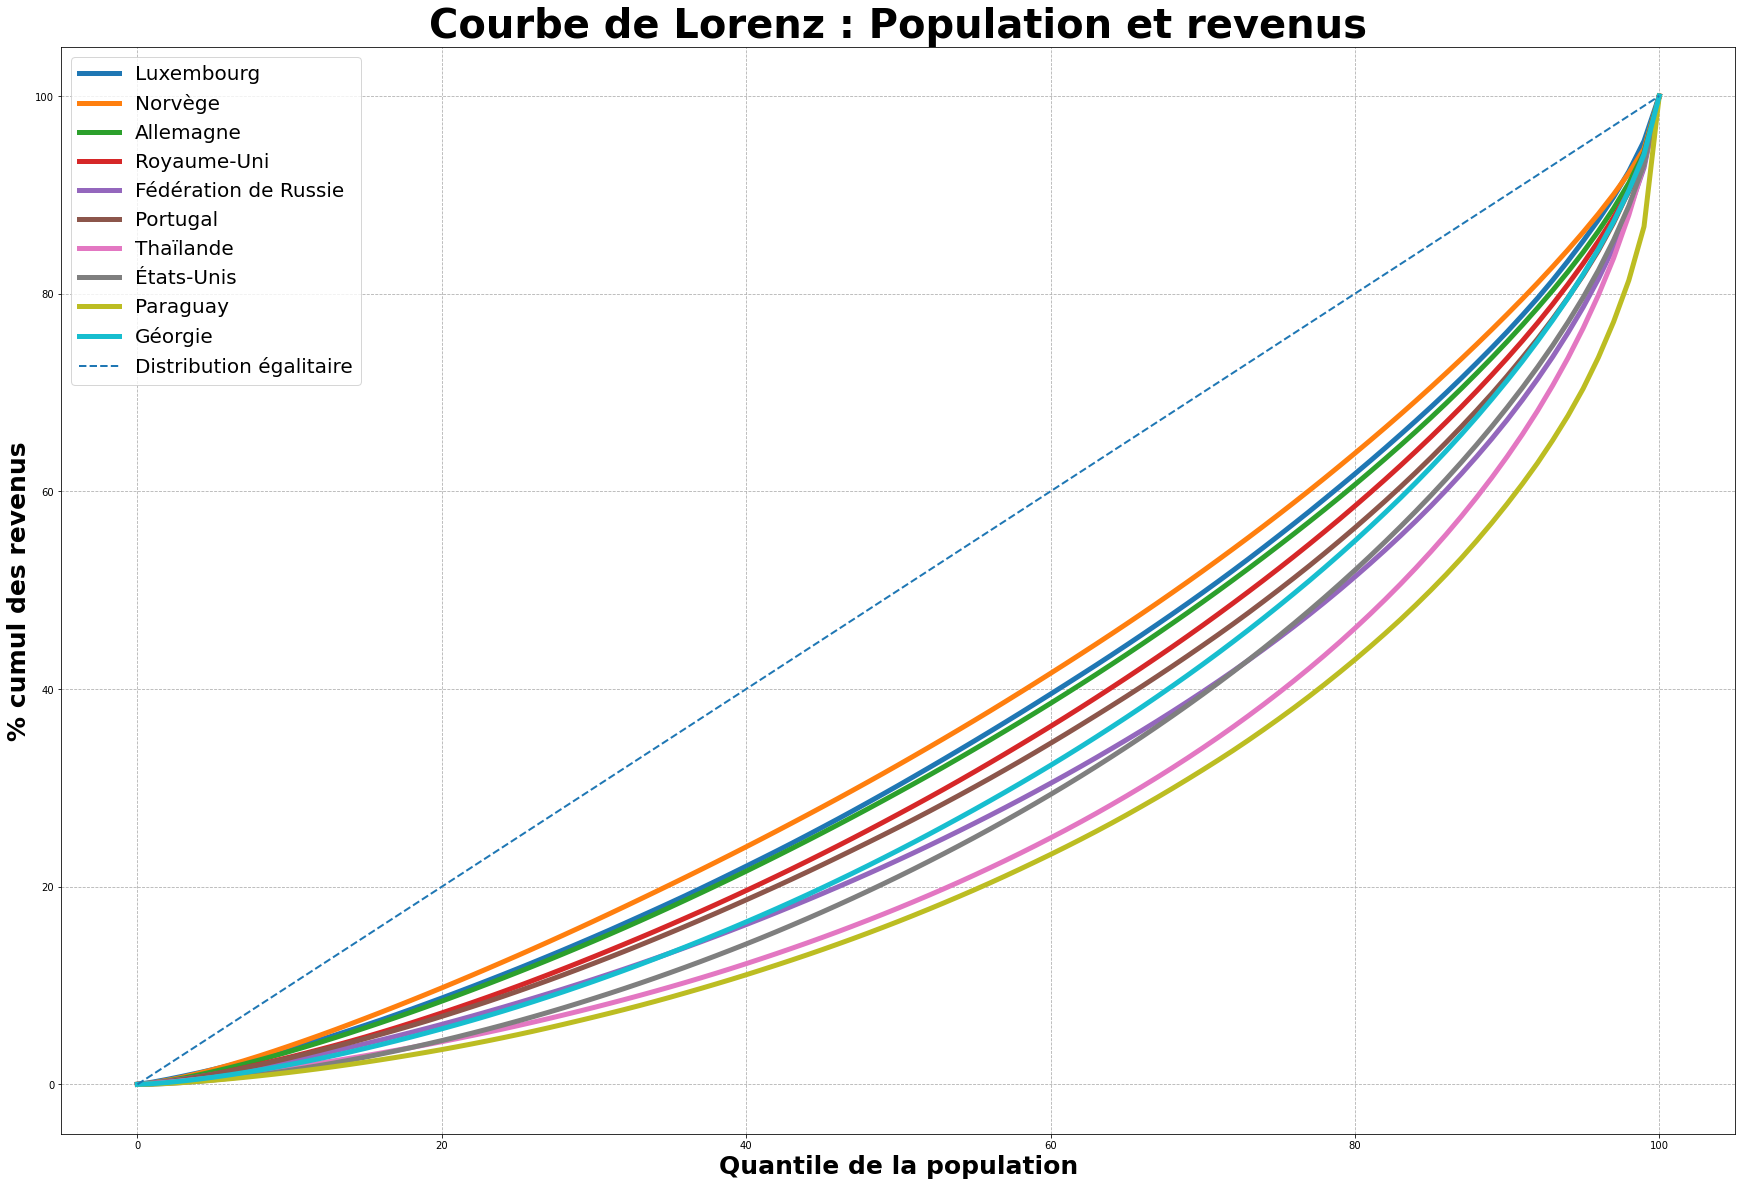

In [55]:
#Courbe de Lorenz
plt.figure(figsize = (30, 20))
list_gini = []

for pays in country_list: 
    dep = data[data.Pays==pays]['income'].values
    
    # lorenz : Courbe de lorenz
    lorenz = np.cumsum(np.sort(dep))/dep.sum()*100
    lorenz = np.append([0],lorenz) 
    x = np.append([0],data[data.Pays==pays]['quantile'])    
    plt.plot(x,lorenz, label=pays,linewidth=5)
    
plt.plot([0,100],[0,100],linestyle='--',linewidth=2, label='Distribution égalitaire')
plt.xlabel('Quantile de la population',fontsize=25,fontweight = 'bold')
plt.ylabel('% cumul des revenus',fontsize=25,fontweight = 'bold')
plt.legend(fontsize=20)
plt.grid(True,linestyle='--')
plt.title('Courbe de Lorenz : Population et revenus',fontsize=40,fontweight = 'bold')

plt.savefig('p7_graphic/lorenz.jpg')
plt.show()

### Courbe de Gini

In [56]:
gdf = pd.read_csv('gini.csv')

In [57]:
gdf

,Country Name,Country Code,Time,Time Code,Indice GINI
0,Allemagne,DEU,2004,YR2004,30.4
1,Allemagne,DEU,2005,YR2005,32.1
2,Allemagne,DEU,2006,YR2006,31.3
3,Allemagne,DEU,2007,YR2007,31.3
4,Allemagne,DEU,2008,YR2008,31.1
...,...,...,...,...,...
75,Géorgie,GEO,2007,YR2007,38.1
76,Géorgie,GEO,2008,YR2008,38.5
77,Géorgie,GEO,2009,YR2009,38.2
78,Géorgie,GEO,2010,YR2010,39.5


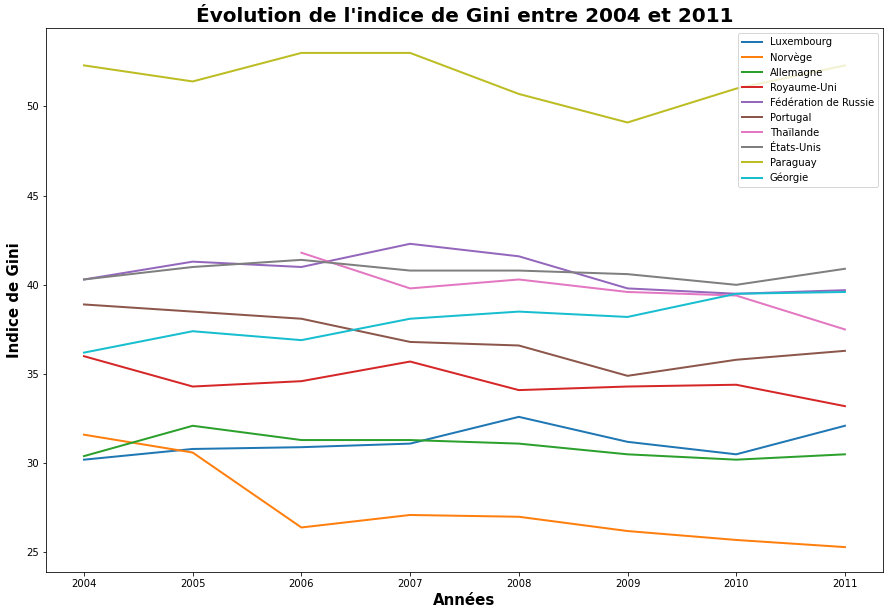

In [58]:
plt.figure(figsize=(15,10))

for c_code, c_name in zip(country_code, country_list):   
    plt.plot(gdf[gdf['Country Code']==c_code]['Time'],
             gdf[gdf['Country Code']==c_code]['Indice GINI'],linewidth=2, label=c_name)

plt.title("Évolution de l'indice de Gini entre 2004 et 2011", fontsize=20, fontweight='bold')
plt.xlabel("Années", fontsize=15, fontweight='bold')
plt.ylabel("Indice de Gini", fontsize=15, fontweight='bold')
plt.legend()

plt.savefig('p7_graphic/gini_evolution.jpg')
plt.show()

In [59]:
a = data[['Pays', 'gini']].groupby('Pays').sum().reset_index()
a

,Pays,gini
0,Afrique du Sud,65.9779
1,Albanie,29.4624
2,Allemagne,29.6465
3,Argentine,43.9902
4,Arménie,25.3108
...,...,...
111,Viet Nam,36.7481
112,"Yémen, Rép. du",36.4161
113,"Égypte, République arabe d’",32.0568
114,Équateur,49.9880


In [60]:
a['rang']=a.gini.rank(method='first')

### Les 5 pays à l'indice de Gini le plus élevé.

In [61]:
a.sort_values('rang', ascending=False).head(5)

,Pays,gini,rang
0,Afrique du Sud,65.9779,116.0
43,Honduras,59.1667,115.0
23,Colombie,55.9271,114.0
40,Guatemala,55.8293,113.0
91,République centrafricaine,55.1732,112.0


### Les 5 pays à l'indice de Gini le plus petit

In [62]:
a.sort_values('rang').head(5)

,Pays,gini,rang
98,Slovénie,22.0731,1.0
95,République slovaque,23.7219,2.0
96,République tchèque,24.2864,3.0
101,Suède,24.4887,4.0
108,Ukraine,24.5140,5.0


### Position de la France

In [63]:
a[a.Pays=='France']

,Pays,gini,rang
36,France,31.9096,40.0


### La France se situe à la 40ème place des pays ayant l'indice de Gini le moins élevé. Ce n'est pas étonnant, quand nous savons que les inégalités se sont accentués dans ce pays.

## Mission 3

### Obtention du coefficient d'élasticité (IGEincome) pour chaque pays

In [64]:
gdim = pd.read_csv('GDIMMay2018+(1).csv').loc[:, ['countryname', 'iso3', 'region', 'IGEincome']]
gdim.rename(columns={'countryname': 'country', 'iso3' : 'country_code'}, inplace=True)
gdim.drop_duplicates(inplace=True)
gdim.drop_duplicates(subset=['country'], keep = 'last', inplace=True)

In [65]:
gdim

,country,country_code,region,IGEincome
0,Afghanistan,AFG,South Asia,NaN
12,Angola,AGO,Sub-Saharan Africa,NaN
60,Albania,ALB,Europe & Central Asia,0.815874
84,Argentina,ARG,Latin America & Caribbean,NaN
99,Armenia,ARM,Europe & Central Asia,NaN
...,...,...,...,...
6378,West Bank and Gaza,PSE,Middle East & North Africa,NaN
6390,"Yemen, Rep.",YEM,Middle East & North Africa,NaN
6426,South Africa,ZAF,Sub-Saharan Africa,0.677000
6480,"Congo, Dem. Rep.",COD,Sub-Saharan Africa,0.707703


In [66]:
gdim_na = gdim[gdim['IGEincome'].isna()]
gdim_na

,country,country_code,region,IGEincome
0,Afghanistan,AFG,South Asia,NaN
12,Angola,AGO,Sub-Saharan Africa,NaN
84,Argentina,ARG,Latin America & Caribbean,NaN
99,Armenia,ARM,Europe & Central Asia,NaN
279,Azerbaijan,AZE,Europe & Central Asia,NaN
...,...,...,...,...
6298,"Venezuela, RB",VEN,Latin America & Caribbean,NaN
6366,Vanuatu,VUT,East Asia & Pacific,NaN
6378,West Bank and Gaza,PSE,Middle East & North Africa,NaN
6390,"Yemen, Rep.",YEM,Middle East & North Africa,NaN


In [67]:
gdim_na.region.unique()

array(['South Asia', 'Sub-Saharan Africa', 'Latin America & Caribbean',
       'Europe & Central Asia', 'Middle East & North Africa',
       'High income', 'East Asia & Pacific'], dtype=object)

In [68]:
gdim_na[gdim_na.region == 'High income'].country.unique()

array(['Estonia', 'Hungary', 'Iceland', 'Israel', 'Lithuania', 'Poland',
       'Uruguay'], dtype=object)

In [69]:
gdim_na_pays = list(gdim_na.country.unique())

In [70]:
for pays in gdim_na_pays :
    if list(gdim.loc[gdim.country == pays, 'region']) == ['South Asia']:
        gdim.loc[gdim.country == pays, 'IGEincome']= 0.50
    elif list(gdim.loc[gdim.country == pays, 'region']) == ['Sub-Saharan Africa']:
        gdim.loc[gdim.country == pays, 'IGEincome'] = 0.66
    elif list(gdim.loc[gdim.country == pays, 'region']) == ['Latin America & Caribbean']:
        gdim.loc[gdim.country == pays, 'IGEincome'] = 0.66
    elif list(gdim.loc[gdim.country == pays, 'region']) == ['Europe & Central Asia']:
        gdim.loc[gdim.country == pays, 'IGEincome'] = 0.40                                                               
    elif list(gdim.loc[gdim.country == pays, 'region']) == ['East Asia & Pacific']:
        gdim.loc[gdim.country == pays, 'IGEincome'] = 0.50
    elif list(gdim.loc[gdim.country == pays, 'region']) == ['Middle East & North Africa']:
        gdim.loc[gdim.country == pays, 'IGEincome'] = 0.66
    else : gdim.loc[gdim.country == pays, 'IGEincome'] =  0.40 

In [71]:
data.rename(columns={'country':'country_code'}, inplace=True)

In [72]:
data = data.merge(gdim[['country_code', 'IGEincome']], on='country_code', how='left')
data.drop('groupe_gini',axis=1, inplace=True)

In [73]:
data

,Pays,Population,country_code,gdpppp,income,nb_quantiles,quantile,year_survey,gini,income_avg,IGEincome
0,Albanie,2947314,ALB,7297.0,728.89795,100,1,2008,0.294624,2994.829902,0.815874
1,Albanie,2947314,ALB,7297.0,916.66235,100,2,2008,0.294624,2994.829902,0.815874
2,Albanie,2947314,ALB,7297.0,1010.91600,100,3,2008,0.294624,2994.829902,0.815874
3,Albanie,2947314,ALB,7297.0,1086.90780,100,4,2008,0.294624,2994.829902,0.815874
4,Albanie,2947314,ALB,7297.0,1132.69970,100,5,2008,0.294624,2994.829902,0.815874
...,...,...,...,...,...,...,...,...,...,...,...
11595,Afrique du Sud,49779472,ZAF,9602.0,24553.56800,100,96,2008,0.659779,5617.904880,0.677000
11596,Afrique du Sud,49779472,ZAF,9602.0,28858.03100,100,97,2008,0.659779,5617.904880,0.677000
11597,Afrique du Sud,49779472,ZAF,9602.0,35750.29000,100,98,2008,0.659779,5617.904880,0.677000
11598,Afrique du Sud,49779472,ZAF,9602.0,46297.31600,100,99,2008,0.659779,5617.904880,0.677000


### Pays dont les valeurs IGEincome sont manquantes.

In [74]:
miss_inc = data[data['IGEincome'].isna()]

In [75]:
miss_inc

,Pays,Population,country_code,gdpppp,income,nb_quantiles,quantile,year_survey,gini,income_avg,IGEincome
10000,République arabe syrienne,17827827,SYR,4512.00,143.18066,100,1,2004,0.347612,685.817495,NaN
10001,République arabe syrienne,17827827,SYR,4512.00,179.06183,100,2,2004,0.347612,685.817495,NaN
10002,République arabe syrienne,17827827,SYR,4512.00,195.83022,100,3,2004,0.347612,685.817495,NaN
10003,République arabe syrienne,17827827,SYR,4512.00,210.05444,100,4,2004,0.347612,685.817495,NaN
10004,République arabe syrienne,17827827,SYR,4512.00,222.11244,100,5,2004,0.347612,685.817495,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11395,Kosovo,1747383,XKX,7949.25,5155.36470,100,96,2008,0.304475,2176.269035,NaN
11396,Kosovo,1747383,XKX,7949.25,5689.52930,100,97,2008,0.304475,2176.269035,NaN
11397,Kosovo,1747383,XKX,7949.25,6233.73930,100,98,2008,0.304475,2176.269035,NaN
11398,Kosovo,1747383,XKX,7949.25,7366.67700,100,99,2008,0.304475,2176.269035,NaN


In [76]:
miss_inc.Pays.unique()

array(['République arabe syrienne', 'Kosovo'], dtype=object)

### La Syrie est un pays du Moyen-Orient  => pj = 0.5
### Le Kosovo est un pays de l'Europe => pj=0.4
### Nous nous sommes aidé du fichier 'elasticity.txt' pour trouver ces valeurs

In [77]:
data.loc[data.Pays == 'République arabe syrienne', 'IGEincome'] = 0.5
data.loc[data.Pays == 'Kosovo', 'IGEincome'] = 0.4

In [78]:
data.isna().any()

Pays            False
Population      False
country_code    False
gdpppp          False
income          False
nb_quantiles    False
quantile        False
year_survey     False
gini            False
income_avg      False
IGEincome       False
dtype: bool

### Nous remplacerons IGEincome par pj pour plus de compréhension

In [79]:
data.rename(columns={'IGEincome':'pj'}, inplace=True)

### 1) Générer un grand nombre de réalisations d'une variable que nous appellerons selon une loi normale. Le choix de la moyenne et de l'écart-type n'auront pas d'incidence sur le résultat final. n doit être supérieur à 1000 fois le nombre de quantiles.

### 2) Générer n réalisations du terme d'erreur selon une loi normale de moyenne 0 et d'écart-type 1.

In [80]:
nb_quantiles = 100
n = 1000*nb_quantiles

In [81]:
def generate_incomes(n, pj):
    # On génère les revenus des parents (exprimés en logs) selon une loi normale.
    # La moyenne et variance n'ont aucune incidence sur le résultat final (ie. sur le caclul de la classe de revenu)
    ln_y_parent = st.norm(0,1).rvs(size=n) #1
    # Génération d'une réalisation du terme d'erreur epsilon
    residues = st.norm(0,1).rvs(size=n) #2
    return np.exp(pj*ln_y_parent + residues), np.exp(ln_y_parent)

### 3) Pour une valeur donnée de (par exemple 0.9), calculer y_child . Le choix de (alpha) n'a aucune incidence sur le résultat final et peut être supprimé. A ce stade, y_child contient des valeurs dont l'ordre de grandeur ne reflète pas la réalité, mais cela n'a pas d'influence pour la suite.


In [82]:
pj = 0.9 #Exemple
y_child, y_parent = generate_incomes(n, pj)

### 4) Pour chacun des n individus générés, calculez la classe de revenu c_i_child ainsi que la classe de revenu de ses parents c_i_parent , à partir de y_child et y_parent.

In [83]:
def quantiles(l, nb_quantiles):
    size = len(l)
    l_sorted = l.copy()
    l_sorted = l_sorted.sort_values()
    quantiles = np.round(np.arange(1, nb_quantiles+1, nb_quantiles/size) -0.5 +1./size)
    q_dict = {a:int(b) for a,b in zip(l_sorted,quantiles)}
    return pd.Series([q_dict[e] for e in l])

def compute_quantiles(y_child, y_parents, nb_quantiles):
    y_child = pd.Series(y_child)
    y_parents = pd.Series(y_parents)
    c_i_child = quantiles(y_child, nb_quantiles)
    c_i_parent = quantiles(y_parents, nb_quantiles)
    sample = pd.concat([y_child, y_parents, c_i_child, c_i_parent], axis=1)
    sample.columns = ["y_child", "y_parents", "c_i_child","c_i_parent"]
    return sample

In [84]:
sample = compute_quantiles(y_child, y_parent, nb_quantiles)

In [85]:
sample

,y_child,y_parents,c_i_child,c_i_parent
0,0.919550,1.580135,48,68
1,1.523116,2.628367,63,84
2,0.880694,2.136272,47,78
3,0.173429,0.558067,10,28
4,0.839284,1.871069,45,74
...,...,...,...,...
99995,3.026740,2.489727,80,82
99996,0.664846,0.364514,38,16
99997,1.120401,0.125253,54,2
99998,1.673886,2.856988,65,86


### 5) À partir de cette dernière information, estimer pour chaque c_i_child la distribution conditionnelle de c_i_parent.

In [86]:
def distribution(counts, nb_quantiles):
    distrib = []
    total = counts["counts"].sum()
    
    if total == 0 :
        return [0] * nb_quantiles
    
    for q_p in range(1, nb_quantiles+1):
        subset = counts[counts.c_i_parent == q_p]
        if len(subset):
            nb = subset["counts"].values[0]
            distrib += [nb / total]
        else:
            distrib += [0]
    return distrib   

def conditional_distributions(sample, nb_quantiles):
    counts = sample.groupby(["c_i_child","c_i_parent"]).apply(len)
    counts = counts.reset_index()
    counts.columns = ["c_i_child","c_i_parent","counts"]
    
    mat = []
    for child_quantile in np.arange(nb_quantiles)+1:
        subset = counts[counts.c_i_child == child_quantile]
        mat += [distribution(subset, nb_quantiles)]
    return np.array(mat) 

def plot_conditional_distributions(p, cd, nb_quantiles):
    plt.figure()
    
    # La ligne suivante sert à afficher un graphique en "stack bars", sur ce modèle : https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
    cumul = np.array([0] * nb_quantiles)
    
    for i, child_quantile in enumerate(cd):
        plt.bar(np.arange(nb_quantiles)+1, child_quantile, bottom=cumul, width=0.95, label = str(i+1) +"e")
        cumul = cumul + np.array(child_quantile)

    plt.axis([.5, nb_quantiles*1.3 ,0 ,1])
    plt.title("p=" + str(p))
    plt.legend()
    plt.xlabel("quantile parents")
    plt.ylabel("probabilité du quantile enfant")
    plt.savefig('p7_graphic/cd.jpg')
    plt.show()
    
def proba_cond(c_i_parent, c_i_child, mat):
    return mat[c_i_child, c_i_parent]

In [87]:
cd = conditional_distributions(sample, nb_quantiles)

In [88]:
cd

array([[0.256, 0.14 , 0.073, ..., 0.   , 0.   , 0.   ],
       [0.103, 0.073, 0.075, ..., 0.   , 0.   , 0.   ],
       [0.093, 0.071, 0.062, ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.057, 0.062, 0.073],
       [0.   , 0.   , 0.   , ..., 0.078, 0.078, 0.126],
       [0.   , 0.   , 0.   , ..., 0.089, 0.137, 0.238]])

In [89]:
c_i_child = 97
c_i_parent =99
p = proba_cond(c_i_parent, c_i_child, cd)
print("\nP(c_i_parent = {} | c_i_child = {}, pj = {}) = {}".format(c_i_parent, c_i_child, pj, p))


P(c_i_parent = 99 | c_i_child = 97, pj = 0.9) = 0.073


### Calcul des probabilités selon c_i_child sachant c_i_parent, et implémentation de la colonne probabilites.

In [90]:
probabilites = []
cdx = conditional_distributions(sample, nb_quantiles+1)
for x, y in zip(sample['c_i_child'], sample['c_i_parent']):
    p = proba_cond(y, x, cdx)
    probabilites.append(p)

In [91]:
sample['probabilites'] = probabilites

In [92]:
sample

,y_child,y_parents,c_i_child,c_i_parent,probabilites
0,0.919550,1.580135,48,68,0.015
1,1.523116,2.628367,63,84,0.011
2,0.880694,2.136272,47,78,0.009
3,0.173429,0.558067,10,28,0.017
4,0.839284,1.871069,45,74,0.008
...,...,...,...,...,...
99995,3.026740,2.489727,80,82,0.019
99996,0.664846,0.364514,38,16,0.009
99997,1.120401,0.125253,54,2,0.003
99998,1.673886,2.856988,65,86,0.011


### 6) Pour vérifier la cohérence du code, nous pouvons créer un graphique représentant ces distributions conditionnelles.

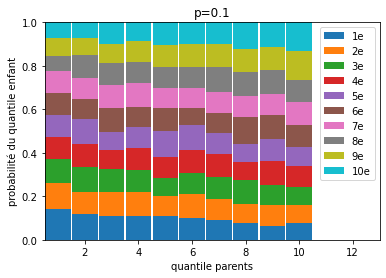

In [93]:
pj_strong = 0.1                
nb_quantiles_strong = 10       
n_strong  = 1000*nb_quantiles_strong   

y_child_strong, y_parents_strong = generate_incomes(n_strong, pj_strong)
sample_strong = compute_quantiles(y_child_strong, y_parents_strong, nb_quantiles_strong)
cd_strong = conditional_distributions(sample_strong, nb_quantiles_strong)
plot_conditional_distributions(pj_strong, cd_strong, nb_quantiles_strong)

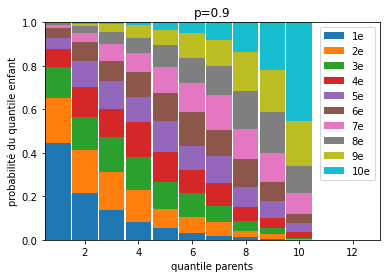

In [94]:
#Exemple d'une très faible mobilité avec un pj = 0.9
pj_low = 0.9                
nb_quantiles_low = 10       
n_low  = 1000*nb_quantiles_low   

y_child_low, y_parents_low = generate_incomes(n_low, pj_low)
sample_low = compute_quantiles(y_child_low, y_parents_low, nb_quantiles_low)
cd_low = conditional_distributions(sample_low, nb_quantiles_low)
plot_conditional_distributions(pj_low, cd_low, nb_quantiles_low)

### 7) Suppression des individus

In [95]:
sample = sample.iloc[:, 2:]
sample

,c_i_child,c_i_parent,probabilites
0,48,68,0.015
1,63,84,0.011
2,47,78,0.009
3,10,28,0.017
4,45,74,0.008
...,...,...,...
99995,80,82,0.019
99996,38,16,0.009
99997,54,2,0.003
99998,65,86,0.011


### 8) Nouvel échantillon, 500x plus grand que celui de la World Income Distribution

In [96]:
df_500 = data.drop(['nb_quantiles', 'year_survey'], axis=1)

In [97]:
df_500 = pd.concat([df_500]*500, ignore_index=True)

In [98]:
df_500

,Pays,Population,country_code,gdpppp,income,quantile,gini,income_avg,pj
0,Albanie,2947314,ALB,7297.0,728.89795,1,0.294624,2994.829902,0.815874
1,Albanie,2947314,ALB,7297.0,916.66235,2,0.294624,2994.829902,0.815874
2,Albanie,2947314,ALB,7297.0,1010.91600,3,0.294624,2994.829902,0.815874
3,Albanie,2947314,ALB,7297.0,1086.90780,4,0.294624,2994.829902,0.815874
4,Albanie,2947314,ALB,7297.0,1132.69970,5,0.294624,2994.829902,0.815874
...,...,...,...,...,...,...,...,...,...
5799995,Afrique du Sud,49779472,ZAF,9602.0,24553.56800,96,0.659779,5617.904880,0.677000
5799996,Afrique du Sud,49779472,ZAF,9602.0,28858.03100,97,0.659779,5617.904880,0.677000
5799997,Afrique du Sud,49779472,ZAF,9602.0,35750.29000,98,0.659779,5617.904880,0.677000
5799998,Afrique du Sud,49779472,ZAF,9602.0,46297.31600,99,0.659779,5617.904880,0.677000


### 9) Création et assignation de la variables c_i_parents

In [99]:
pays_list=df_500['Pays'].unique()
c_i_parents=[]
nb_quantiles = 100 
n = 500*nb_quantiles 
for pays in pays_list:
    pj=df_500.loc[df_500['Pays']==pays,'pj'].iloc[0]
    y_child, y_parents = generate_incomes(n, pj)
    sample = compute_quantiles(y_child, y_parents, nb_quantiles)
    cd = conditional_distributions(sample, nb_quantiles)
    for c_i_child in range(nb_quantiles):
        for c_i_parent in range(nb_quantiles):
            p = proba_cond(c_i_parent, c_i_child, cd)
            c_i_parents.extend([c_i_parent+1]*(int(p*500)))

In [100]:
c_parent = pd.DataFrame(c_i_parents, columns=['c_i_parents'])

In [101]:
c_parent

,c_i_parents
0,1
1,1
2,1
3,1
4,1
...,...
5799995,100
5799996,100
5799997,100
5799998,100


In [102]:
df_final = pd.concat([df_500, c_parent], axis=1)

In [103]:
df_final

,Pays,Population,country_code,gdpppp,income,quantile,gini,income_avg,pj,c_i_parents
0,Albanie,2947314,ALB,7297.0,728.89795,1,0.294624,2994.829902,0.815874,1
1,Albanie,2947314,ALB,7297.0,916.66235,2,0.294624,2994.829902,0.815874,1
2,Albanie,2947314,ALB,7297.0,1010.91600,3,0.294624,2994.829902,0.815874,1
3,Albanie,2947314,ALB,7297.0,1086.90780,4,0.294624,2994.829902,0.815874,1
4,Albanie,2947314,ALB,7297.0,1132.69970,5,0.294624,2994.829902,0.815874,1
...,...,...,...,...,...,...,...,...,...,...
5799995,Afrique du Sud,49779472,ZAF,9602.0,24553.56800,96,0.659779,5617.904880,0.677000,100
5799996,Afrique du Sud,49779472,ZAF,9602.0,28858.03100,97,0.659779,5617.904880,0.677000,100
5799997,Afrique du Sud,49779472,ZAF,9602.0,35750.29000,98,0.659779,5617.904880,0.677000,100
5799998,Afrique du Sud,49779472,ZAF,9602.0,46297.31600,99,0.659779,5617.904880,0.677000,100


### 11 et 12) La variable c_i_child est bien absente de l'échantillon, et nous avons bien le revenu moyen du pays ainsi que son indice de Gini qui y sont présents.

In [104]:
final_pays = df_final.groupby(['Pays', 'quantile']).mean().reset_index()

In [105]:
final_pays

,Pays,quantile,Population,gdpppp,income,gini,income_avg,pj,c_i_parents
0,Afrique du Sud,1,49779472.0,9602.0,60.490383,0.659779,5617.904880,0.677000,40.970
1,Afrique du Sud,2,49779472.0,9602.0,138.341550,0.659779,5617.904880,0.677000,41.254
2,Afrique du Sud,3,49779472.0,9602.0,192.294500,0.659779,5617.904880,0.677000,41.468
3,Afrique du Sud,4,49779472.0,9602.0,236.994000,0.659779,5617.904880,0.677000,41.700
4,Afrique du Sud,5,49779472.0,9602.0,279.367580,0.659779,5617.904880,0.677000,41.934
...,...,...,...,...,...,...,...,...,...
11595,États-Unis,96,304093966.0,43261.0,69926.370000,0.421799,25503.581661,0.537666,59.268
11596,États-Unis,97,304093966.0,43261.0,77634.820000,0.421799,25503.581661,0.537666,59.472
11597,États-Unis,98,304093966.0,43261.0,88482.840000,0.421799,25503.581661,0.537666,59.682
11598,États-Unis,99,304093966.0,43261.0,106765.260000,0.421799,25503.581661,0.537666,59.874


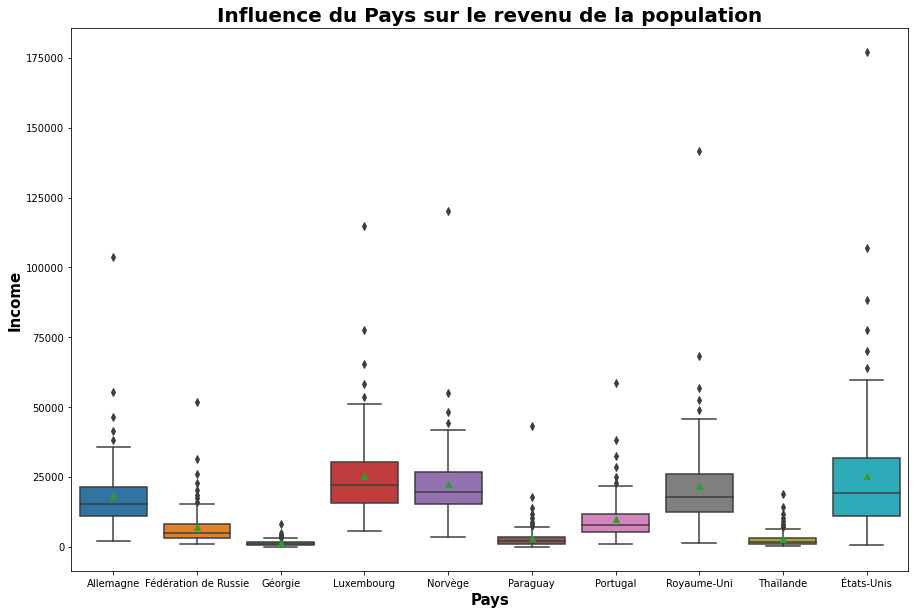

In [106]:
#Représentation des distributions par boxplot 
plt.figure(figsize=(15, 10))

ax = sns.boxplot(x="Pays", y="income", data=final_pays[final_pays.Pays.isin(country_list)], showmeans=True)
plt.title('Influence du Pays sur le revenu de la population', fontsize=20, fontweight='bold')
plt.xlabel('Pays', fontsize=15, fontweight='bold')
plt.ylabel('Income', fontsize=15, fontweight='bold')

plt.savefig('p7_graphic/boxplot_influence_pays.jpg')
plt.show()

### Le boxplot nous permet de constater que le pays de naissance à bien une influence sur le revenu moyen. Nous allons d'ailleurs vérifier si les écarts observés sont significatifs à l'aide de régression linéaire.

### ANOVA (Pays)

In [107]:
anova_income = smf.ols('income ~ Pays', data=df_500).fit()
print(anova_income.summary().tables[0])

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                 4.971e+04
Date:                Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                        02:13:53   Log-Likelihood:            -5.9310e+07
No. Observations:             5800000   AIC:                         1.186e+08
Df Residuals:                 5799884   BIC:                         1.186e+08
Df Model:                         115                                         
Covariance Type:            nonrobust                                         


### Ce modèle permet d'expliquer 49.6% de la variance du revenu de l'individu. L'influence du pays par rapport au revenu est bien significative (p-value>0.05).

In [108]:
# Implémentation de 2 variables "ln_income" et "ln_income_avg"
df_500['ln_income'] = np.log(df_500.income)
df_500['ln_income_avg'] = np.log(df_500['income_avg'])

### ANOVA(normal)

In [109]:
modele1 = smf.ols('income ~ gini + income_avg ', data=df_500).fit()
print(modele1.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                 2.858e+06
Date:                Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                        02:13:55   Log-Likelihood:            -5.9310e+07
No. Observations:             5800000   AIC:                         1.186e+08
Df Residuals:                 5799997   BIC:                         1.186e+08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.918e-09     13.738  -2.12e-10      1.0

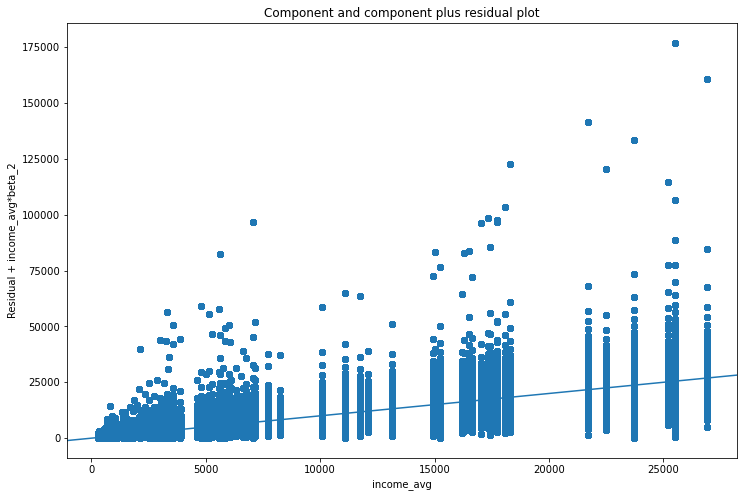

In [110]:
#Approche visuelle rapide de notre régression linéaire
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_ccpr(modele1, "income_avg", ax=ax)
plt.savefig('p7_graphic/ccpr_norm.jpg')
plt.show()

In [111]:
modele_final_1 = smf.ols('income ~ gini + income_avg + c_i_parents', data=df_500).fit()
print(modele_final_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                 1.947e+06
Date:                Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                        02:14:26   Log-Likelihood:            -5.9279e+07
No. Observations:             5800000   AIC:                         1.186e+08
Df Residuals:                 5799996   BIC:                         1.186e+08
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1201.4910     14.490    -82.919      

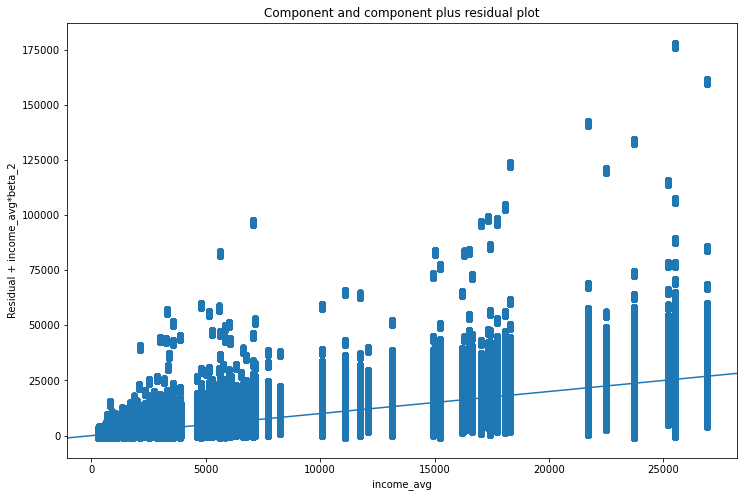

In [112]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_ccpr(modele_final_1, "income_avg", ax=ax)
plt.savefig('p7_graphic/ccpr_norm_f.jpg')
plt.show()

### ANOVA (logarithmique)

In [113]:
modele2 = smf.ols('ln_income ~ gini + ln_income_avg', data=df_500).fit()
print(modele2.summary())

                            OLS Regression Results                            
Dep. Variable:              ln_income   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                 7.793e+06
Date:                Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                        02:14:56   Log-Likelihood:            -6.3181e+06
No. Observations:             5800000   AIC:                         1.264e+07
Df Residuals:                 5799997   BIC:                         1.264e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4471      0.003    157.862

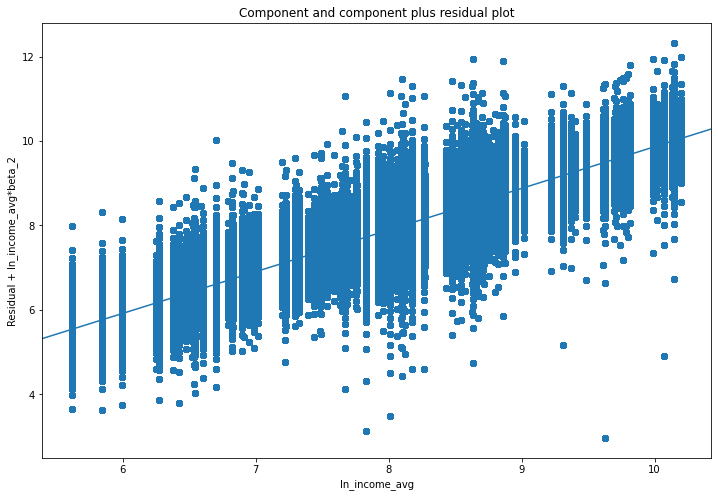

In [114]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_ccpr(modele2, "ln_income_avg", ax=ax)
plt.savefig('p7_graphic/ccpr_log.jpg')
plt.show()

In [115]:
modele_final_2 = smf.ols('ln_income ~ gini + ln_income_avg + c_i_parents', data=df_500).fit()
print(modele_final_2.summary())

                            OLS Regression Results                            
Dep. Variable:              ln_income   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                 5.421e+06
Date:                Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                        02:15:26   Log-Likelihood:            -6.2278e+06
No. Observations:             5800000   AIC:                         1.246e+07
Df Residuals:                 5799996   BIC:                         1.246e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.2267      0.003     79.955

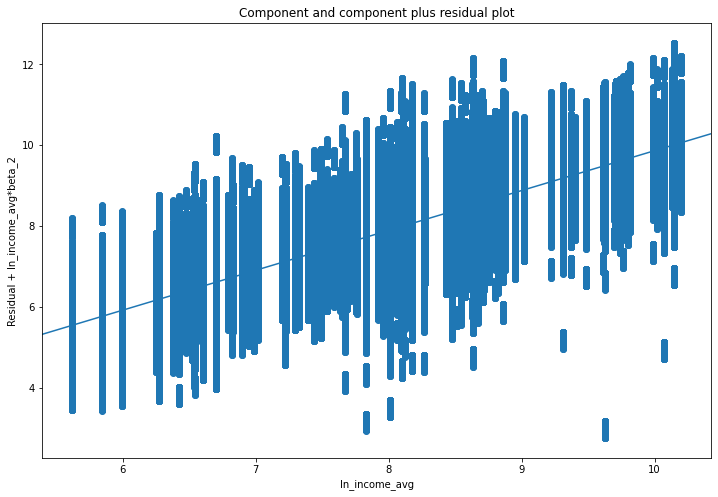

In [116]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_ccpr(modele_final_2, "ln_income_avg", ax=ax)
plt.savefig('p7_graphic/ccpr_log_f.jpg')
plt.show()

### En comparant les 2 modèles de régressions linéaires (normal et logarithmique), nous pouvons conclure que le modèle logarithmique est plus performant que le modèle normal, et ceci pour plusieurs raisons:
### Le modèle normal peut être sujet à une multicolinéarité des variables, c'est à dire que dans ce modèle, nous avons des variables qui sont fortement corrélées entre elles, ce qui nous pose problème ici car cela implique qu'une variable corrélée n'est pas utile dans le modèle car corrélée à une autre.
### Le modèle logarithmique n'ayant pas le problème énoncé ci-dessus est bien plus efficace (meilleur coefficient) et respecte bien les critères de parcimonie (AIC et BIC)
### Nous allons alors nous servir du modèle logarithmique pour répondre aux questions.

### Décomposition de la variance totale expliquée
### Formule de décomposition de la variance SCT = SCE + SCR

In [117]:
res_regr_log = sm.stats.anova_lm(modele2, typ=2)
res_regr_log 

,sum_sq,df,F,PR(>F)
gini,1.151813e+05,1.0,2.226762e+05,0.0
ln_income_avg,6.895166e+06,1.0,1.333020e+07,0.0
Residual,3.000100e+06,5799997.0,NaN,NaN


In [118]:
#SCT
regr_log_sct = res_regr_log.values[:,0].sum()
regr_log_sct

10010447.504209846

In [119]:
#SCE
regr_log_sce = res_regr_log.values[0,0]+res_regr_log.values[1,0]
regr_log_sce

7010347.117753297

In [120]:
#SCR
regr_log_scr = res_regr_log.values[2,0]
regr_log_scr

3000100.386456549

In [121]:
#R2 squared
regr_log_r2 = regr_log_sce/regr_log_sct
regr_log_r2

0.7003030698482888

In [122]:
#Variance expliquée par le revenu moyen du pays (ln_income_avg)
regr_log_sce_incomeavg = res_regr_log.values[1,0]/regr_log_sct
regr_log_sce_incomeavg

0.6887969634313511

In [123]:
#Variance expliquée par l'indice de Gini
regr_log_sce_gini = res_regr_log.values[0,0]/regr_log_sct
regr_log_sce_gini

0.01150610641693775

In [124]:
#Les résidus
regr_log_sce_residual = res_regr_log.values[2,0]/regr_log_sct
regr_log_sce_residual

0.2996969301517111

### 1) Modèle (Pays : revenu moyen + gini) :
### Ce modèle explique 70% de la variance du revenu de l'individu. Le pays a bien un rôle clé quant à la variation du revenu de l'individu, dont:
### 1.2% par l'indice de Gini
### 69% par le revenu moyen
### Ce qui nous laisse que 30% de la variance expliquée par d'autres facteurs non pris en compte dans ce modèle (les résidus)

### Le coefficient négatif de régression associé à l'indice de Gini est assez évocateur, plus l'indice de Gini est élevé (et donc plus le pays est inégalitaire), plus revenu baisse. Le fait de vivre dans un pays inégalitaire semble donc plus défavorisant, mais peut être compensé par le revenu moyen du pays.

In [125]:
res_regr_log = sm.stats.anova_lm(modele_final_2, typ=2)
res_regr_log 

,sum_sq,df,F,PR(>F)
gini,1.153048e+05,1.0,2.299714e+05,0.0
ln_income_avg,6.895680e+06,1.0,1.375320e+07,0.0
c_i_parents,9.205480e+04,1.0,1.836001e+05,0.0
Residual,2.908046e+06,5799996.0,NaN,NaN


In [126]:
#SCT
regr_log_sct = res_regr_log.values[:,0].sum()
regr_log_sct

10011085.45774904

In [127]:
#SCE
regr_log_sce = res_regr_log.values[0,0]+res_regr_log.values[1,0]+res_regr_log.values[2,0]
regr_log_sce

7103039.872986354

In [128]:
#SCR
regr_log_scr = res_regr_log.values[2,0]
regr_log_scr

92054.80169385884

In [129]:
#R2 squared
regr_log_r2 = regr_log_sce/regr_log_sct
regr_log_r2

0.7095174547219827

In [130]:
#Variance expliquée par le revenu moyen du pays (ln_income_avg)
regr_log_sce_incomeavg = res_regr_log.values[1,0]/regr_log_sct
regr_log_sce_incomeavg

0.6888044581901723

In [131]:
#Variance expliquée par l'indice de Gini
regr_log_sce_gini = res_regr_log.values[0,0]/regr_log_sct
regr_log_sce_gini

0.011517709758725802

In [132]:
#Variance expliquée par la classe de revenu des parents
regr_log_sce_pa = res_regr_log.values[2,0]/regr_log_sct
regr_log_sce_pa

0.00919528677308455

In [133]:
#Les résidus
regr_log_sce_residual = res_regr_log.values[3,0]/regr_log_sct
regr_log_sce_residual

0.2904825452780174

### 2) Modèle (Pays + classe parents):
### Ce modèle explique 71% de la variance du revenu, dont:
### 1% de la variance expliquée par la classe des parents 
### 1.2% par l'indice de Gini
### 69% par le revenu moyen
### Ce qui nous laisse 29% de la variance expliquée par d'autres facteurs non pris en compte dans ce modèle (les résidus)